# Mechanistic Tests

## Adding continuous funding mechanism

In [1]:
# For displaying image files
from IPython.display import Image

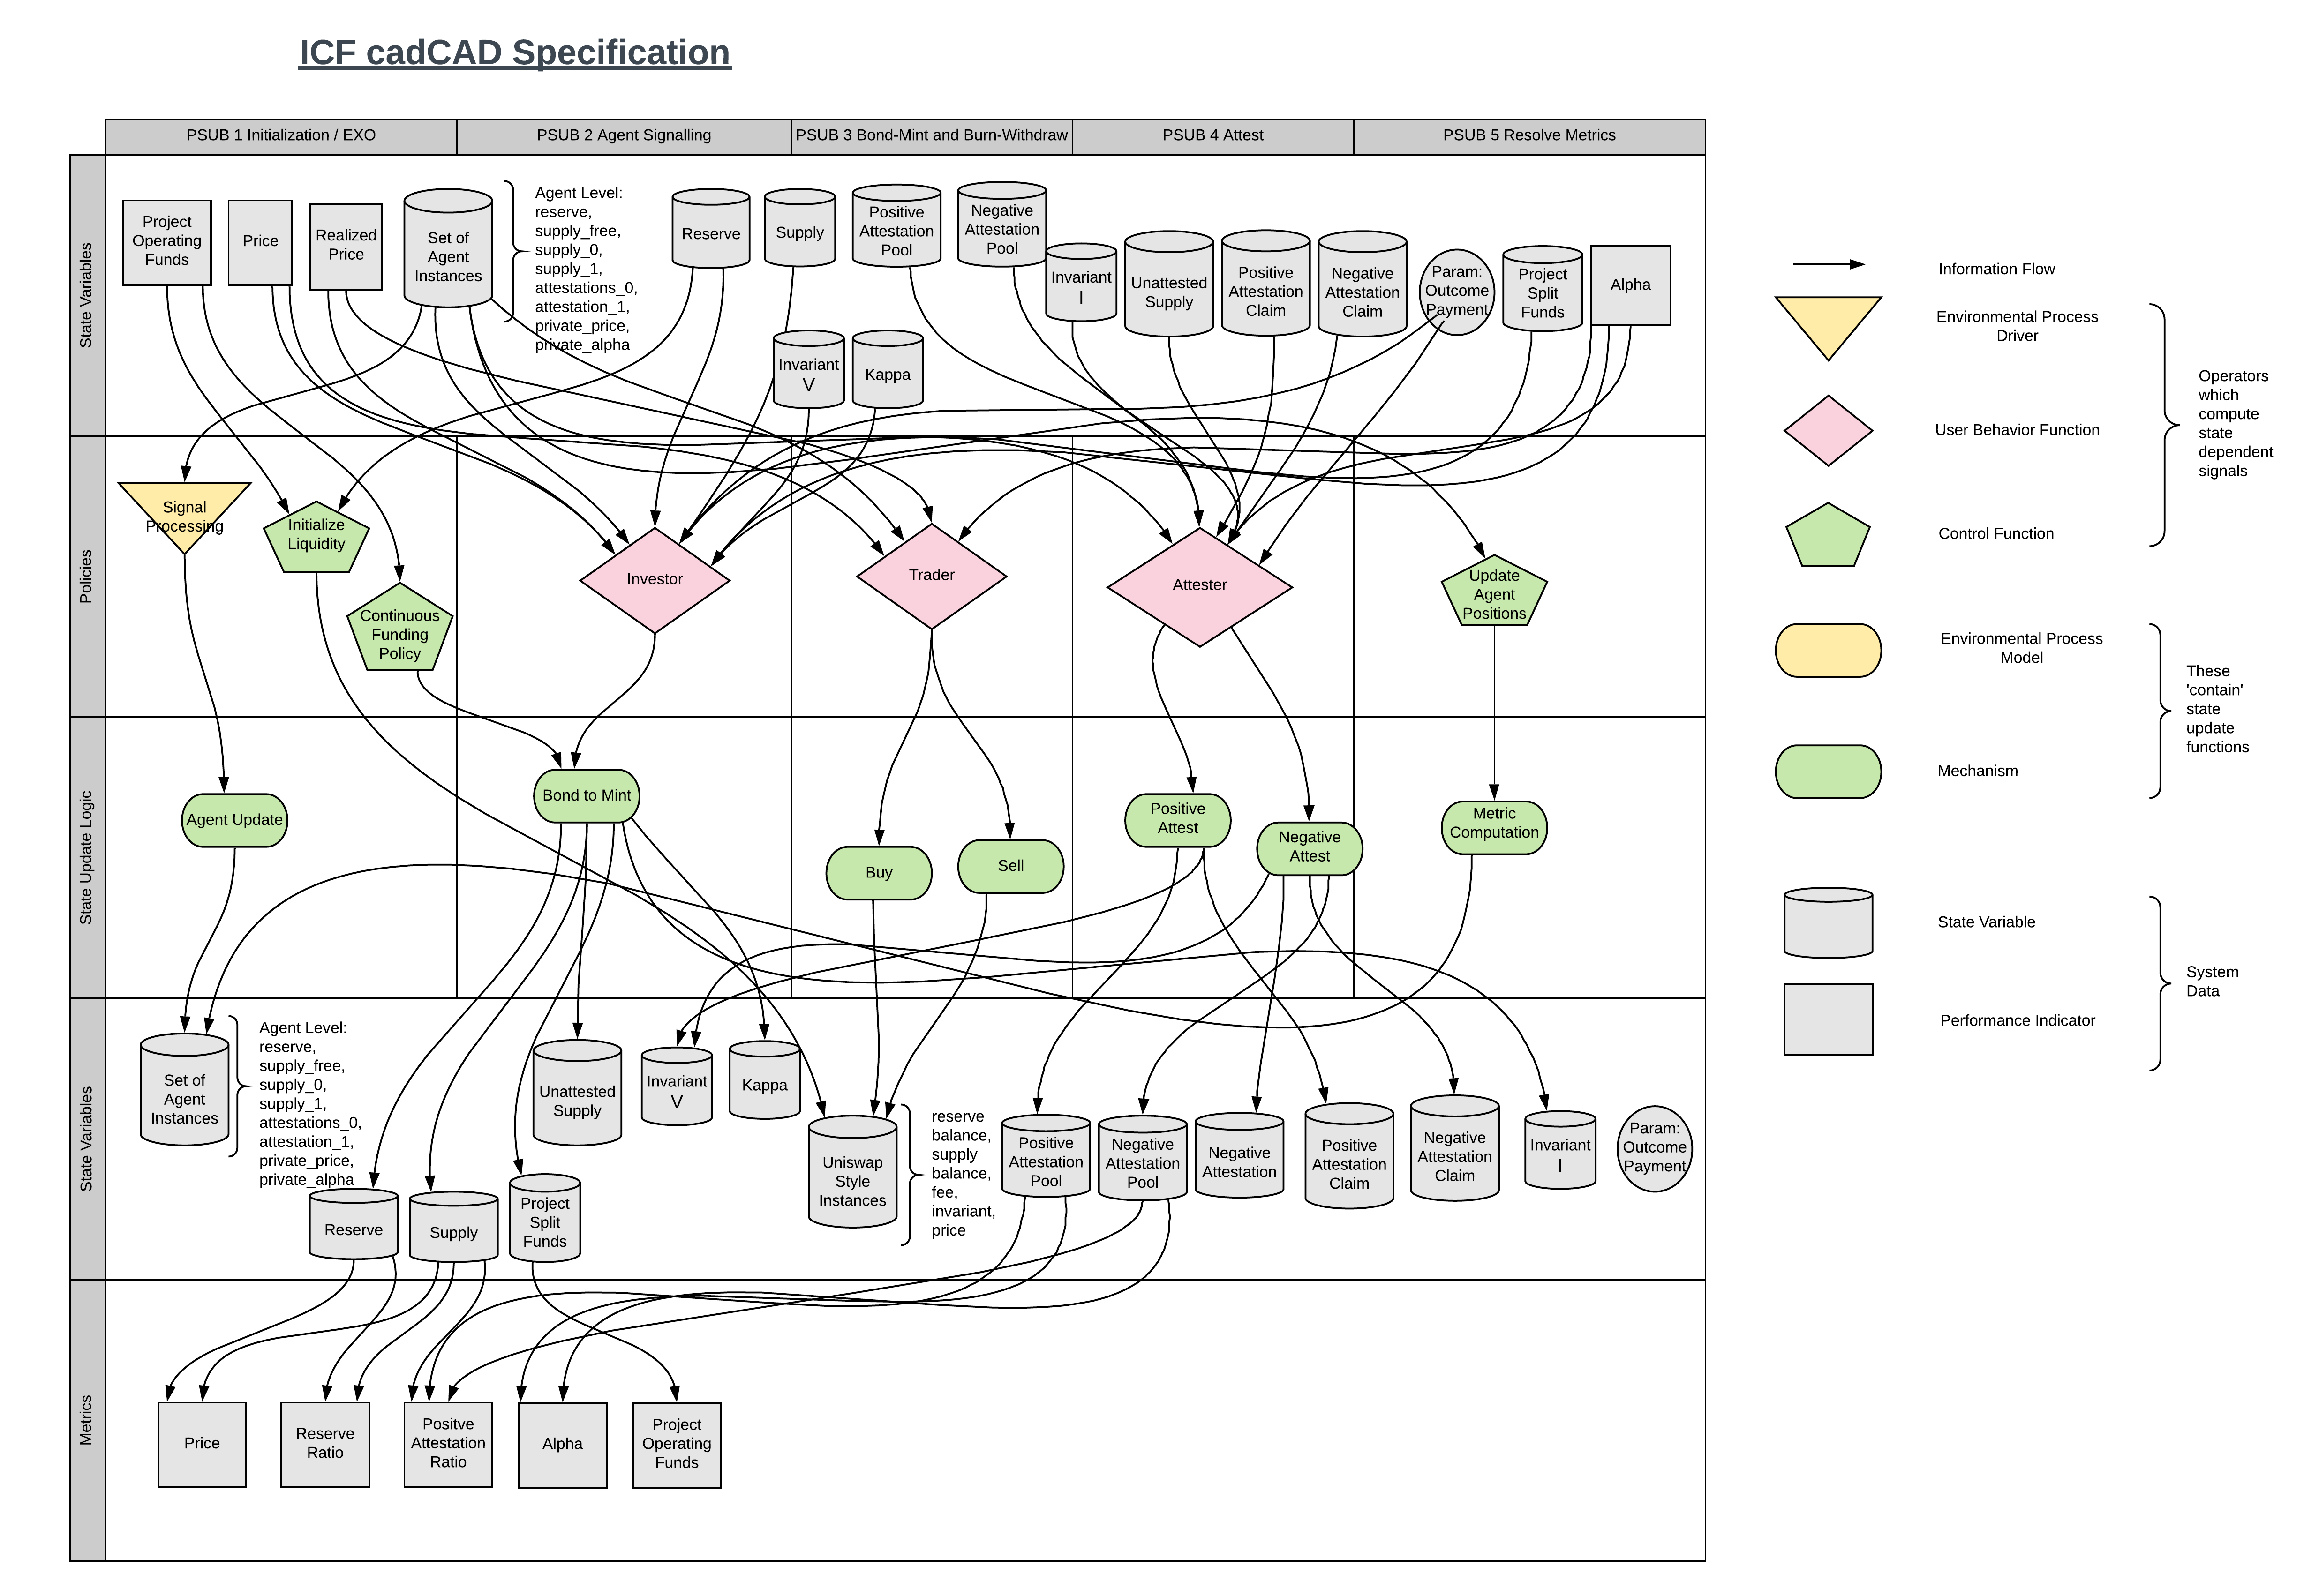

In [2]:
Image("images\Phase_3_continuous.png")

In [3]:
# import sys
# sys.path.append('../')
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

3   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0   194008.670486   232882.683026       37442.801898                0.463   

   agent_private_price  
0                0.463   Time  38
agent['agent_private_price'] =  0.46099999999999997
agent['agent_private_alpha'] =  0.46099999999999997
r -6.600085332864741e-13
Agent reserve too low. No bond/burn | r =  -6.600085332864741e-13
Negative attestation. | alpha =  0.5581934539318862 private_alpha =  0.46099999999999997
amt_neg =  3505.632330553838
amt_Q0 =  0.10138454631467549
::::delta R:::: 0.0
::::AMTBOND:::: 0
PRICE (BOND/BURN):  0.04984063474884138
PRICE pbar (from bondburn update) = 0.0
r -6.600085332864741e-13
Agent reserve too low. No bond/burn | r =  -6.600085332864741e-13
Negative attestation. | alpha =  0.5581934539318862 private_alpha =  0.46099999999999997
amt_neg =  3533.003315853893
amt_Q0 =  0.10217463230410928
PRICE (ATTEST):  0.04953385728139818
Negative attestation 1
S =  464758.70934160

In [4]:
pip freeze | grep cadCAD

cadCAD==0.4.22
Note: you may need to restart the kernel to use updated packages.


In [5]:
experiments = run.run()

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised': 10000, 'C': 20000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 2000, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': True, 'THETA': 0.5, 'ENABLE_BURN': True}, 'simulation_id': 0, 'run_id': 0, 'subset_id': 0}, {'M': {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised': 10000, 'C': 20000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 2000, 'rules_price': 'martin', 'E': 0.2, 'ENABLE_CONTINUOUS': False, 'THETA': 0.5, 'ENABLE_BURN': True}, 'simulation_id': 0, 'run_id': 1, 'subset_id': 1}]


### Bonded funds are split into backing the bond (into reserve fund) and backing the project (funds_from_bond).

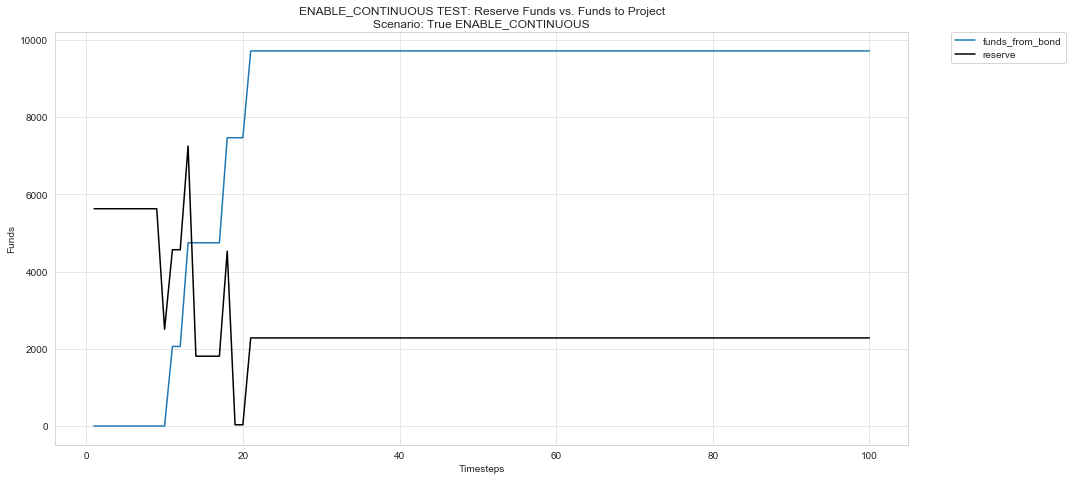

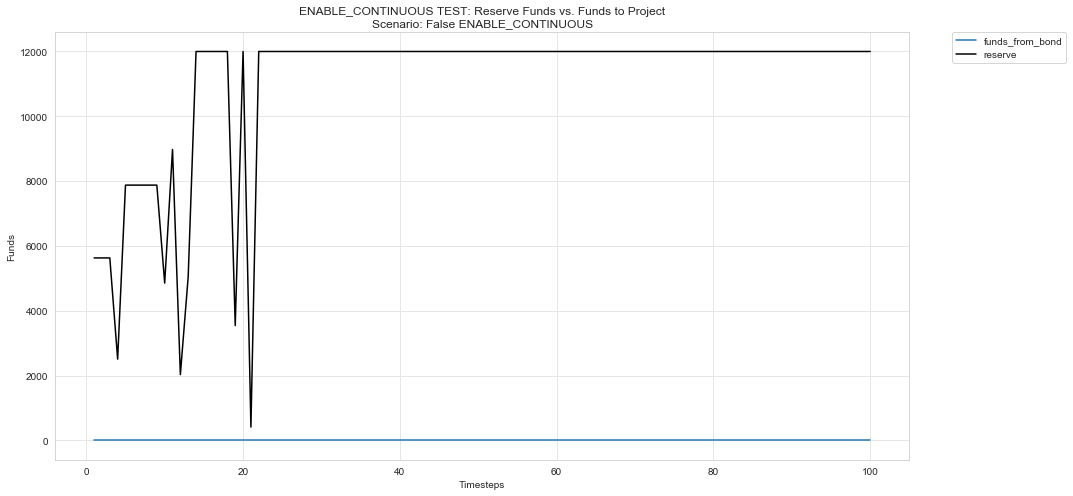

In [19]:
experiments = experiments.sort_values(by =['ENABLE_CONTINUOUS']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['ENABLE_CONTINUOUS']
    cc_label = experiments.iloc[cc_idx]['ENABLE_CONTINUOUS']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['ENABLE_CONTINUOUS']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  
           
        plot_label = experiment['ENABLE_CONTINUOUS']
        ax = axs
        title = 'ENABLE_CONTINUOUS TEST: Reserve Funds vs. Funds to Project' + '\n' + 'Scenario: ' + str(cc_label)  + ' ENABLE_CONTINUOUS'
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
        
        df.plot(x='timestep', y='funds_from_bond', label='funds_from_bond', ax=ax, legend=True)
        df.plot(x='timestep', y='reserve', label='reserve', ax=ax, legend=True, color = colors[5])

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

In [7]:
experiments.dataset[0]['reserve'].tail()

981     12000.0
986     12000.0
991     12000.0
996     12000.0
1001    12000.0
Name: reserve, dtype: float64

In [8]:
experiments.dataset[0]['funds_from_bond'].tail()

981     0.0
986     0.0
991     0.0
996     0.0
1001    0.0
Name: funds_from_bond, dtype: float64

In [18]:
experiments.dataset[1]['funds_from_bond'].tail()

480    9717.502042
485    9717.502042
490    9717.502042
495    9717.502042
500    9717.502042
Name: funds_from_bond, dtype: float64

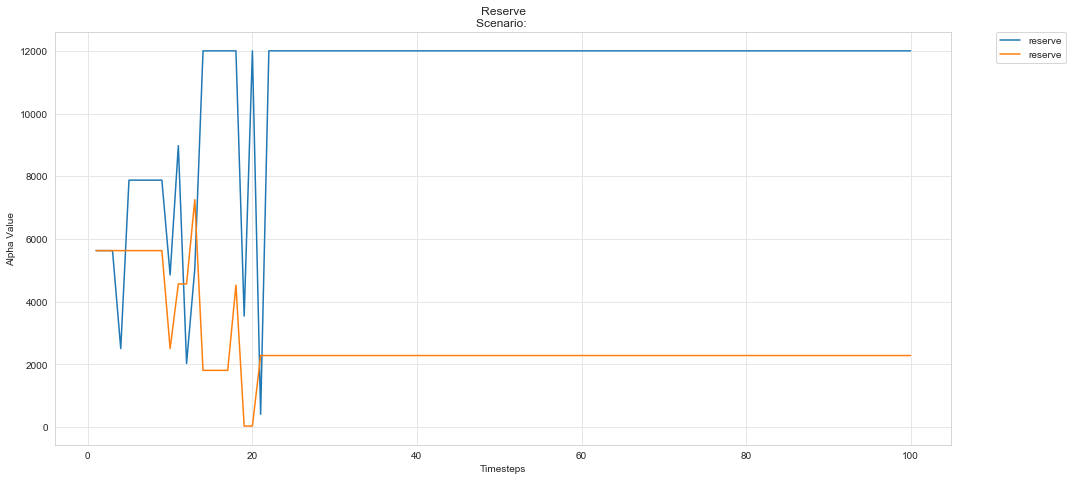

In [10]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  
        
        df = df.groupby('timestep').agg({'reserve': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Reserve' + '\n' + 'Scenario: ' 
        #+ str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Reserve Funds')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

        ax.plot(df.timestep, df[('reserve','mean')],label='reserve') 

        ax.fill_between(df.timestep, df[('reserve','min')], df[('reserve','max')])#, supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

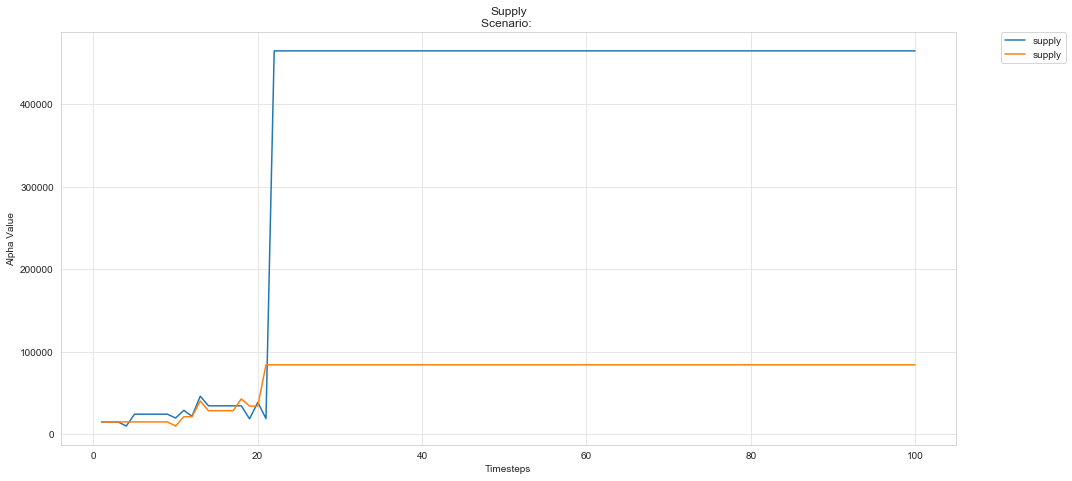

In [11]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  
        
        df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Supply' + '\n' + 'Scenario: ' 
        #+ str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Supply Tokens')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

        ax.plot(df.timestep, df[('supply','mean')],label='supply') 

        ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')])#, supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()
